https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)  # one extra colums due to servive
print(test.shape)

(891, 12)
(418, 11)


In [4]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
train.info()
# age - 10% - 15% value missing
# cabin - approx. 70% missing values - can't be use { delete this }
# NOTE: be 100% sure before deletign the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.drop(columns=['Cabin'], inplace=True) # inplace is use to make parmanent change

In [7]:
test.info()
# age - 10% - 15% value missing
# cabin - approx. 70% missing values - can't be use { delete this }

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.drop(columns=['Cabin'], inplace=True) # inplace is use to make parmanent change

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
#another method to find null columns is using isnull() or isnull().sum()
train.isnull()
# False - not null
# True - null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [12]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


In [13]:
# filling value of null fillna()
# dropping column of null dropna()

In [14]:
# filling Embarked 2 missing value of train using mode
print(train['Embarked'].value_counts()) # showing count of each destination
print()
print(train['Embarked'].mode()) # showing destination of maimum frequency of a destination

train['Embarked'].fillna("S", inplace=True)

print(train.isnull().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

0    S
Name: Embarked, dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [15]:
# filling Fare 1 missing value of test using mean (to get mean of price)
print(test['Fare'].mean())

test['Fare'].fillna(test['Fare'].mean(), inplace=True)

print(test.isnull().sum())

35.627188489208635
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


In [16]:
# now the age is only the obstical.

In [17]:
# sns.distplot(train["Age"]) -> we will see after filling null values in age

In [18]:
# selecting 177 random value for test,from range of one standard deviation minus to mean, to one standard deviation plus to mean.
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(), 177)
print(train_age)

[38 23 23 22 26 20 41 23 19 30 32 29 21 35 24 36 17 25 40 19 43 33 27 26
 40 26 27 38 32 31 30 35 38 18 40 17 15 34 23 18 34 26 43 36 21 31 43 30
 28 28 29 35 27 38 35 36 42 19 16 26 28 24 37 27 25 24 24 39 17 37 29 15
 15 39 31 28 41 34 40 16 30 31 36 24 26 31 26 21 35 39 18 26 22 32 28 29
 25 25 22 16 16 34 20 39 41 39 40 31 37 25 16 41 40 28 15 27 22 24 16 33
 43 15 35 21 28 23 34 42 15 43 35 26 42 30 26 18 37 34 19 17 28 20 17 40
 28 26 26 34 31 33 38 34 15 34 34 30 19 22 32 30 42 34 15 38 40 22 26 32
 24 40 21 39 41 33 30 16 25]


In [19]:
# filling value of test null ages with generated ages of test.

train['Age'][train['Age'].isnull()] # mapping true values, thats is null values

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [20]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [21]:
train['Age'].isnull().sum()

0

In [22]:
# selecting 86 random value for test,from range of one standard deviation minus to mean, to one standard deviation plus to mean.
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(), 86)
print(test_age)

[18 26 27 23 35 26 37 30 25 27 19 25 31 16 18 43 19 37 27 41 36 38 31 18
 27 32 24 37 34 31 16 32 43 26 35 41 19 32 34 36 28 42 27 37 38 42 21 26
 27 25 26 16 30 28 39 31 38 28 24 37 24 27 34 32 34 24 17 35 42 39 21 40
 36 27 38 38 34 42 19 29 31 36 40 25 28 30]


In [23]:
# filling value of test null ages with generated ages of test.

test['Age'][test['Age'].isnull()] = test_age

train['Age'].isnull().sum()

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\522784279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


0

In [24]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [25]:
# EDA

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# PassengerId is useless but to show output it is required thats why it is needed as primary key

# Servived is our output

## Pclass - dividing into classes and then finding the servival rate

In [27]:
# Pclass = 1
train[train['Pclass'] == 1]['Survived']  # finding id and Servived foe class 1

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [28]:
# finding numbers of servived and not servived in Pclass = 1
train[train['Pclass'] == 1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [29]:
# Pclass = 2

train[train['Pclass'] == 2]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [30]:
# Pclass = 3

train[train['Pclass'] == 3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [31]:
# finding the servival percent in eaach class
# grouping by Pclass and finding percentange of each class using mean() on Servived column
(train.groupby(["Pclass"])["Survived"].mean())*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [32]:
# as class increaces from 1 towards 3, servive chances is increasing, looks like a mathematically collaration betn them. so we cant remove it .

# Name

# Sex

In [33]:
# finding the servival percent in on basis of gender
# grouping by Sex and finding percentange of each gender using mean() on Servived column
(train.groupby(["Sex"])["Survived"].mean())*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [34]:
# female servived > male servived

# Embarked

In [35]:
# finding the servival percent in on basis of gender
# grouping by Embarked and finding percentange of each gender using mean() on Servived column
(train.groupby(["Embarked"])["Survived"].mean())*100

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

# Age

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\2772394355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"])


<Axes: xlabel='Age', ylabel='Density'>

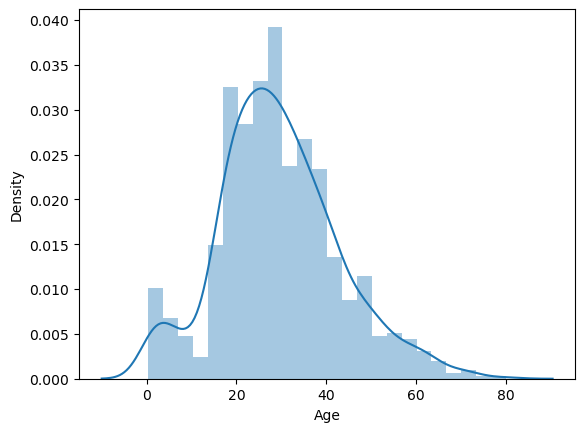

In [36]:
sns.distplot(train["Age"])

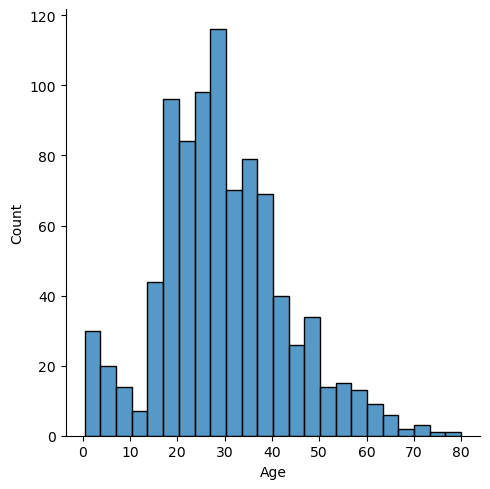

In [37]:
sns.displot(train["Age"])

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\3177556550.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"] == 0])


<Axes: xlabel='Age', ylabel='Density'>

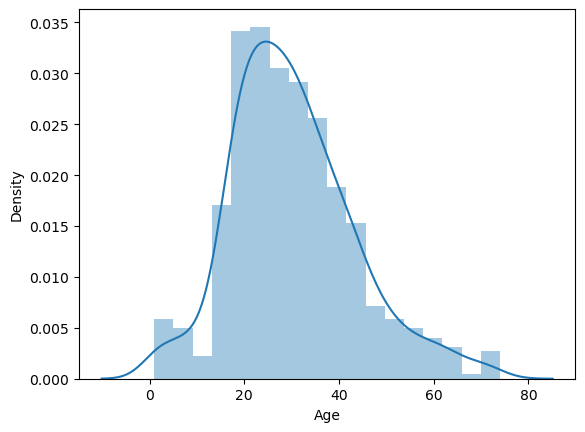

In [38]:
sns.distplot(train["Age"][train["Survived"] == 0])

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\3640561418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"] == 1])


<Axes: xlabel='Age', ylabel='Density'>

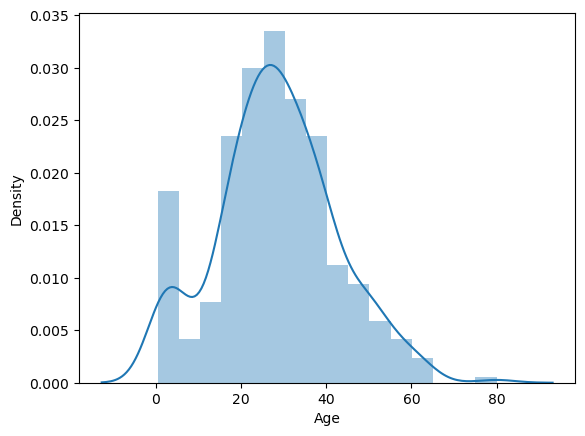

In [39]:
sns.distplot(train["Age"][train["Survived"] == 1])

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\2648221606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"][train["Survived"] == 0]) # blue - not survived
C:\Users\91780\AppData\Local\Temp\ipykernel_20504\2648221606.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age

<Axes: xlabel='Age', ylabel='Density'>

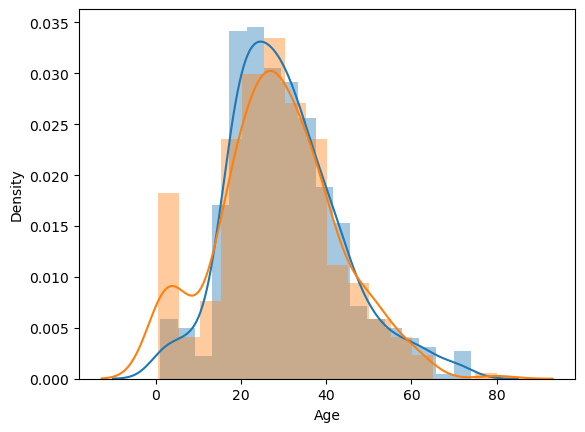

In [40]:
sns.distplot(train["Age"][train["Survived"] == 0]) # blue - not survived
sns.distplot(train["Age"][train["Survived"] == 1]) # orange - servived

# Tickit

In [41]:
# not important
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

# Fare

C:\Users\91780\AppData\Local\Temp\ipykernel_20504\4204281910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fare"][train["Survived"] == 0]) # blue - not survived
C:\Users\91780\AppData\Local\Temp\ipykernel_20504\4204281910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Fa

<Axes: xlabel='Fare', ylabel='Density'>

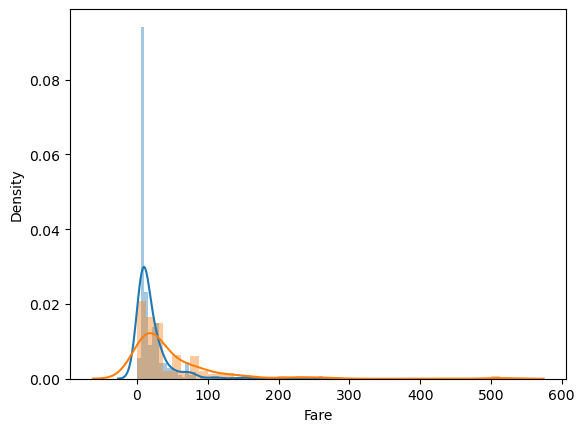

In [42]:
sns.distplot(train["Fare"][train["Survived"] == 0]) # blue - not survived
sns.distplot(train["Fare"][train["Survived"] == 1]) # orange - servived

In [43]:
# fare for low price - people is not serviving
# fare foe high price - people is serviving

In [44]:
# adding SibSp and Parch adn itself in family and adding that column
train["Family"] = train["SibSp"] + train["Parch"] + 1

In [45]:
train["Family"].value_counts()  # signifies catogorical data

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [46]:
test["Family"] = test["SibSp"] + test["Parch"] + 1
test["Family"].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [47]:
# finding the servival percent in family size
# grouping by family and finding percentange of each family size using mean() on Servived column
(train.groupby(["Family"])["Survived"].mean())*100

Family
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64

In [48]:
# family size
# alone- 1
# medium- 2 - 4
# large- > 4

def cal(number):
    if number==1:
        return "alone"
    elif 2 <= number <= 4:
        return "medium"
    else:
        return"large"

In [49]:
train['FamilySize'] = train['Family'].apply(cal)
test['FamilySize'] = test['Family'].apply(cal)

In [50]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,S,4,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,alone


In [51]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,medium
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,8.0500,S,1,alone
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,alone
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1,alone
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,1,alone


In [52]:
train.drop(columns=["SibSp", "Parch", "Parch", "Family"], inplace=True)
test.drop(columns=["SibSp", "Parch", "Parch", "Family"], inplace=True)

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,alone
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,23.4500,S,medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,alone


In [54]:
test

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,7.8292,Q,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,7.0000,S,medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,9.6875,Q,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,8.6625,S,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,12.2875,S,medium
...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,8.0500,S,alone
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,C,alone
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,S,alone
416,1308,3,"Ware, Mr. Frederick",male,28.0,8.0500,S,alone


In [55]:
# saving passenger id of test for future purpose
PassengerId_test = test["PassengerId"].values

In [56]:
train.drop(columns=["Name", "PassengerId"], inplace=True)
test.drop(columns=["Name", "PassengerId"], inplace=True)

In [57]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'], dtype='object')

In [58]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize'], dtype='object')

# Catigorical values: Pclass, Sex, Embarked, FamilySize. But algorith only accept numeric values.

In [59]:
############# LABLE ENCODING ############# 
# Embarked contains 3 cities names and cant be given any numberic value to order the cities.
# so we will break the Embarked values in three different columns


In [60]:
################## MULTI-COLINEARITY #######################
# NOTE: number of catagories turns to numbr of columns - 1
# use get_dummies() **************************************************************************

In [61]:
train = pd.get_dummies(train, columns=["Pclass", "Sex", "Embarked", "FamilySize"], drop_first=True)

In [62]:
train.shape

(891, 10)

In [63]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize_large,FamilySize_medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,25.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [64]:
test = pd.get_dummies(test, columns=["Pclass", "Sex", "Embarked", "FamilySize"], drop_first=True)
test.shape

(418, 9)

In [65]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize_large,FamilySize_medium
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,25.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,28.0,8.0500,0,1,1,0,1,0,0


In [66]:
# setting x and y

x = train.iloc[ : , 1: ].values
y = train.iloc[ : ,0 ].values

In [68]:
# splitting

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [71]:
# calling decission tree, fitting x_train and y_train.

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [72]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
# checking the accurucy with the testing data of train data

y_pred = classifier.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7318435754189944

In [77]:
# testing test data

In [79]:
xf = test.iloc[:,:].values

In [80]:
y_final = classifier.predict(xf)

In [83]:
print(y_final.shape)
print(PassengerId_test.shape)

(418,)
(418,)


In [84]:
# now we will sreate a new excel file and add 2 columns. first PassengerId_test and second servive,
# then upload that to kaggle and check the accuracy

In [88]:
# for that create a new empty dataframe and give first one the name of PassengerIdand second Survived

final = pd.DataFrame()
final

""


In [89]:
# create 2 columns

final["PassengerId"] = PassengerId_test
final["Survived"] = y_final

In [90]:
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
# now submit to kaggle, after converting to csv file

final.to_csv("subission.csv", index=False)